dict_keys(['grad_error_list', 'finite_diff_grad_list', 'our_grad_list'])
dict_keys(['grad_error_list', 'finite_diff_grad_list', 'our_grad_list'])
dict_keys(['grad_error_list', 'all_force_list', 'finite_diff_grad_list', 'our_grad_list'])


/tmp/ipykernel_47904/1952506477.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(list(range(len(grad_error_list))), np.log10(grad_error_list), label=f"delta = {delta}")


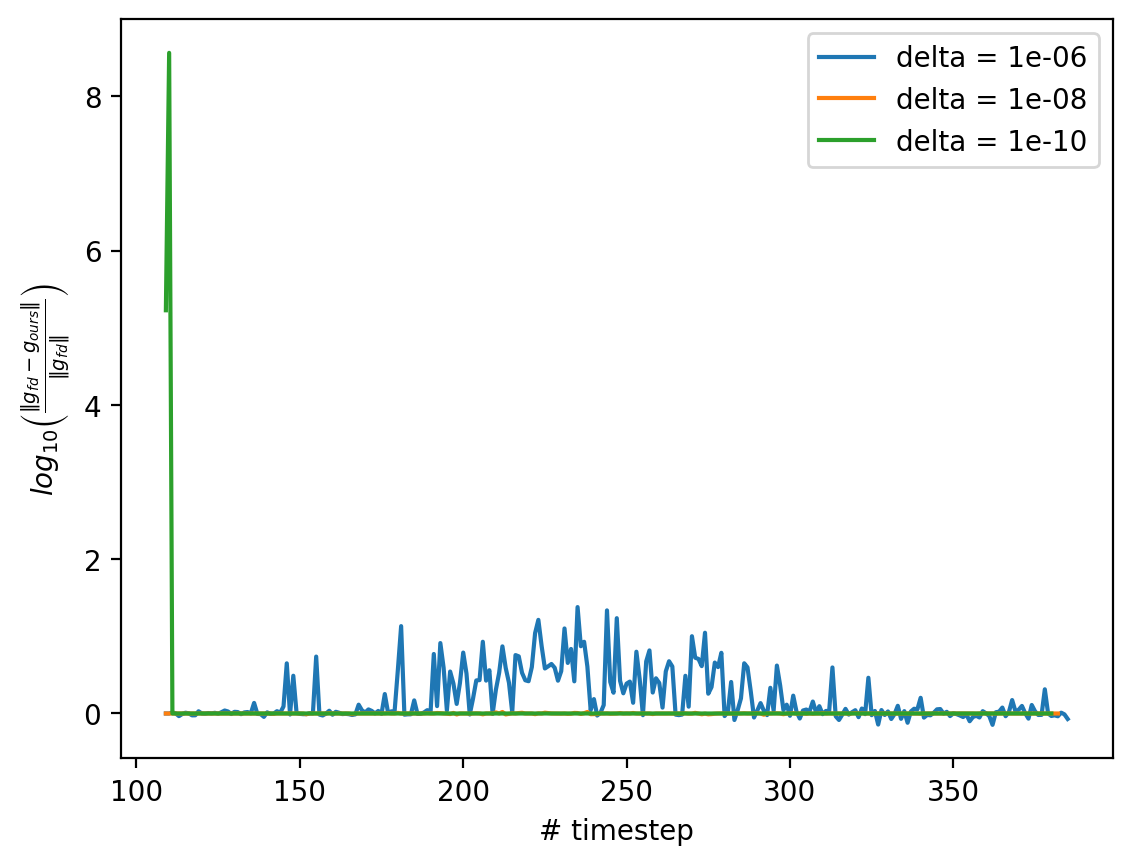

<Figure size 1200x400 with 0 Axes>

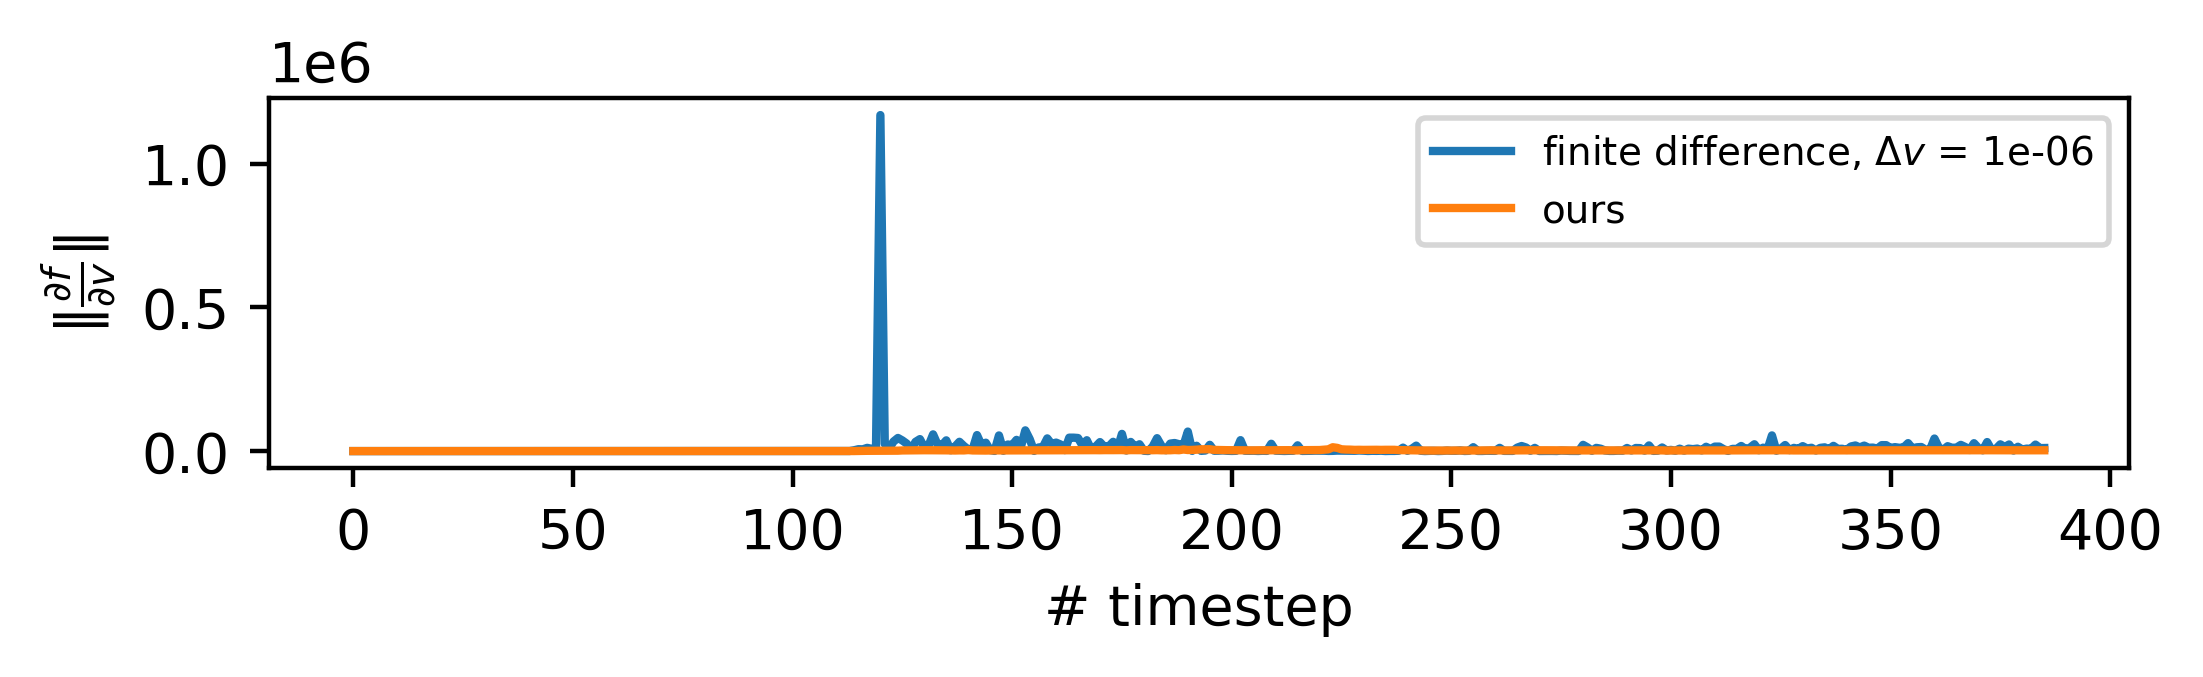

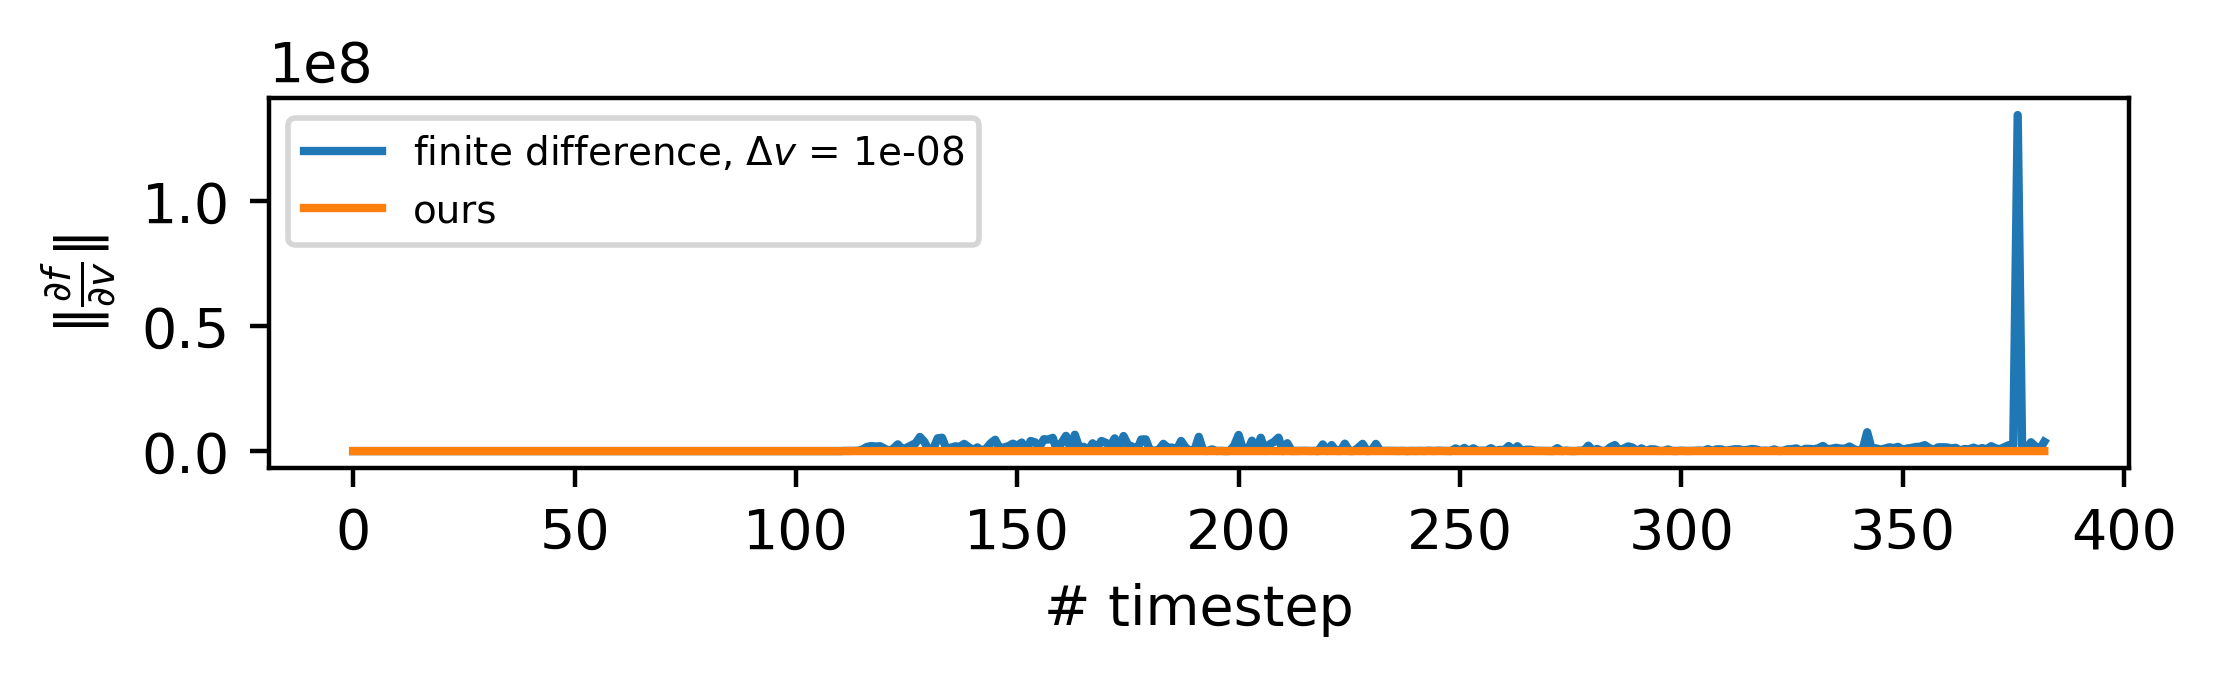

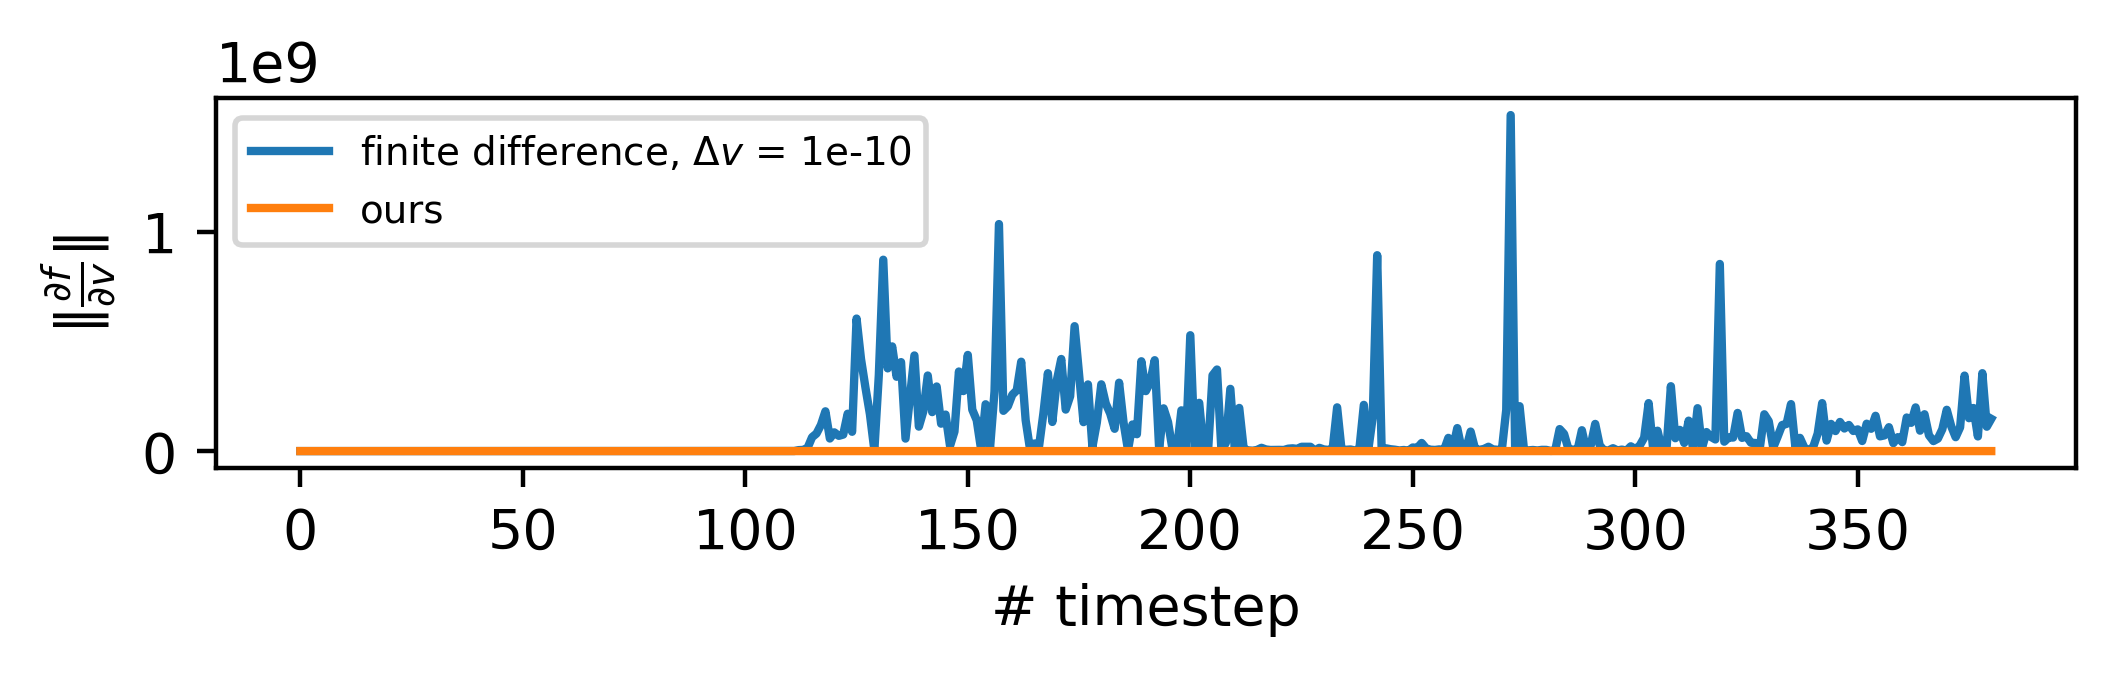

In [8]:
import pickle as pk 
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm 

delta_list = ['1e-06','1e-08', '1e-10']

saved_data_list = []

plt.figure( dpi=200)
for delta in delta_list:
    path = f"./saved_data-stone-skipping-delta{delta}.pk"
    with open(path, "rb") as f:
        data = pk.load(f)

    print(data.keys())
    grad_error_list = data['grad_error_list']

    import matplotlib.pyplot as plt 
    plt.plot(list(range(len(grad_error_list))), np.log10(grad_error_list), label=f"delta = {delta}")
    plt.legend()
    plt.xlabel("# timestep")
    plt.ylabel(r"$log_{10}\left(\frac{\|g_{fd} - g_{ours} \|}{\|g_{fd} \|}\right)$")

for delta in delta_list:
    path = f"./saved_data-stone-skipping-delta{delta}.pk"
    with open(path, "rb") as f:
        data = pk.load(f)

    grad_fd = data['finite_diff_grad_list']
    grad_ours = data['our_grad_list']

    norm_fd = []
    norm_ours = []

    for i in range(len(grad_fd)):
        g1 = grad_fd[i]
        g2 = grad_ours[i]

        norm_fd.append(norm(g1))
        norm_ours.append(norm(g2))

    norm_fd = np.array(norm_fd)
    norm_ours = np.array(norm_ours)

    plt.figure(figsize=(6,1.2), dpi=400)
    n = 0
    plt.plot(list(range(len(norm_fd)))[n:], (norm_fd)[n:], label=f'finite difference, $\Delta v$ = {delta}')
    plt.plot(list(range(len(norm_ours)))[n:], (norm_ours)[n:], label='ours')
    plt.legend(fontsize=7)
    plt.xlabel("# timestep")
    plt.ylabel(r"$\| \frac{\partial f}{\partial v} \|$")

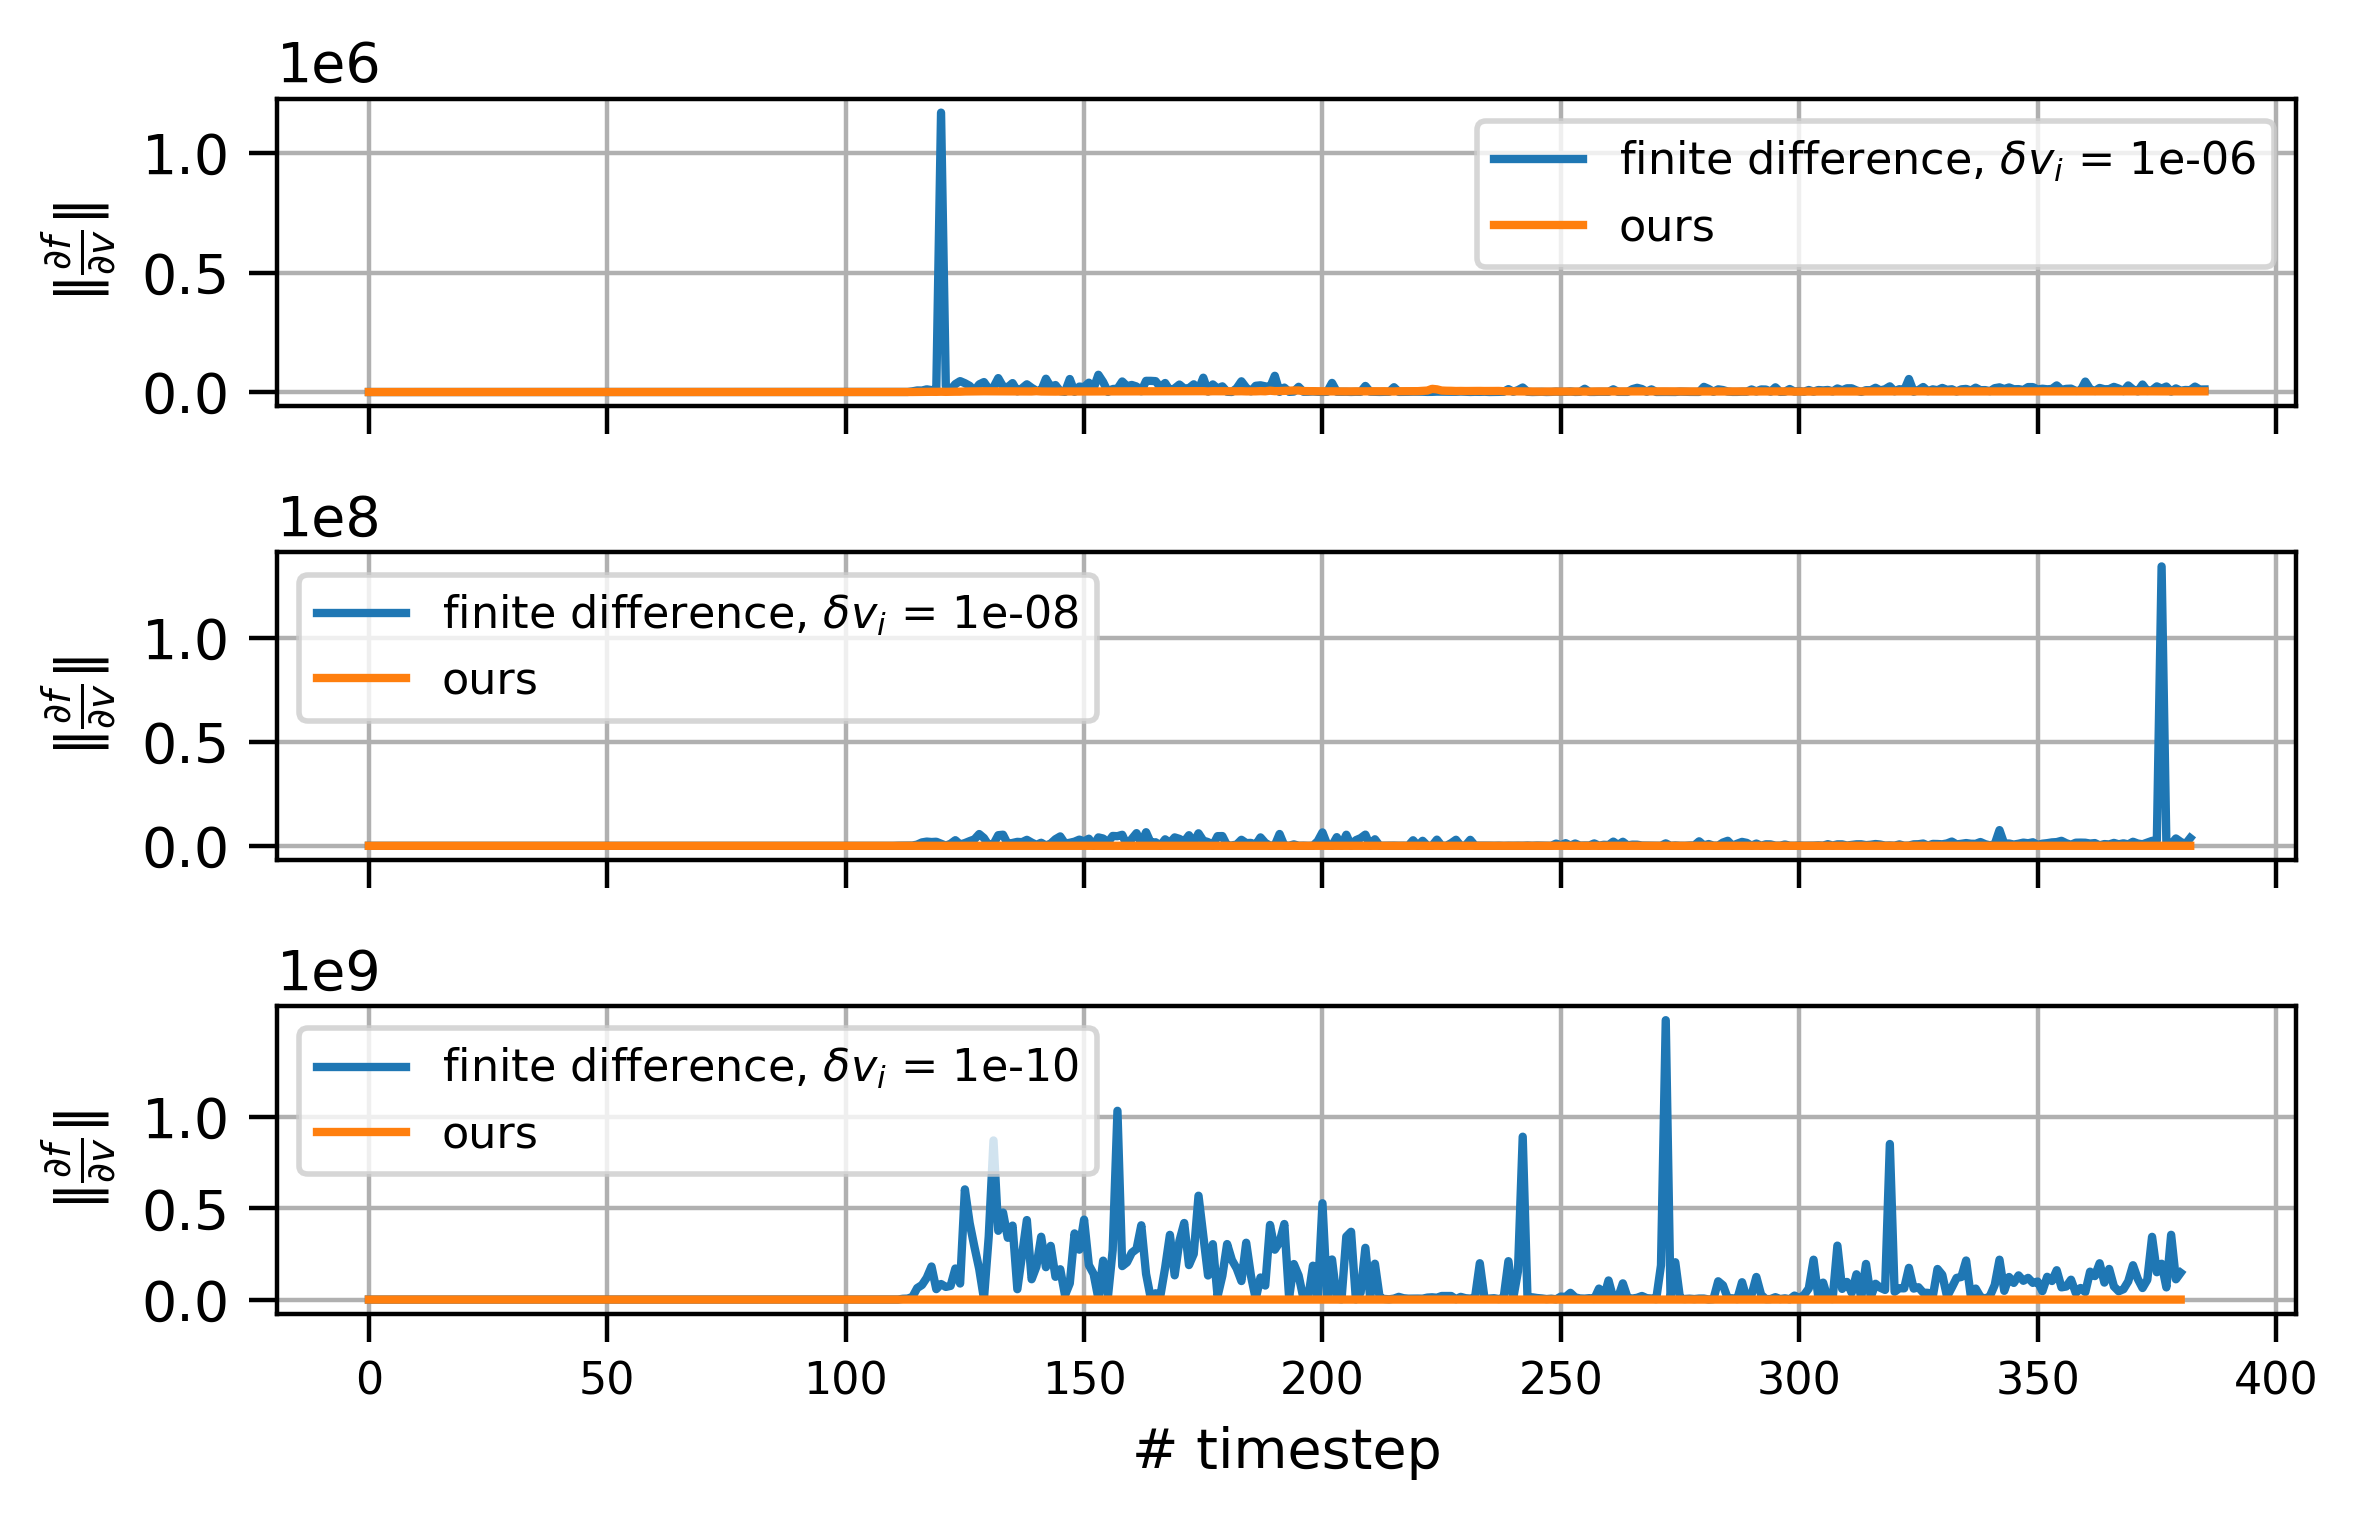

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

# Assuming delta_list is defined somewhere
# delta_list = [...]

# Create a single figure with subplots sharing the x-axis
fig, axes = plt.subplots(len(delta_list), 1, figsize=(6, 1.3 * len(delta_list)), dpi=400, sharex=True)

for i, delta in enumerate(delta_list):
    path = f"./saved_data-stone-skipping-delta{delta}.pk"
    with open(path, "rb") as f:
        data = pk.load(f)

    grad_fd = data['finite_diff_grad_list']
    grad_ours = data['our_grad_list']

    norm_fd = [norm(g) for g in grad_fd]
    norm_ours = [norm(g) for g in grad_ours]

    ax = axes[i] if len(delta_list) > 1 else axes  # Handle subplot axis

    n = 0
    ax.plot(list(range(len(norm_fd)))[n:], (norm_fd)[n:], label=f'finite difference, $\delta v_i$ = {delta}')
    ax.plot(list(range(len(norm_ours)))[n:], (norm_ours)[n:], label='ours')
    
    # Place the legend in the upper right corner of the subplot
    if i == 2:
        ax.legend(fontsize=8, loc='upper left')
    else:
        ax.legend(fontsize=8)
    
    ax.set_ylabel(r"$\| \frac{\partial f}{\partial v} \|$")
    
    # Set font size and length for x-axis and y-axis tick labels
    ax.tick_params(axis='both', which='major', labelsize=8, length=5)  # Adjust length value as needed
    
    # Set font size for y-axis scale (exponent notation)
    ax.tick_params(axis='y', which='major', labelsize=10)
    ax.grid()

    # desired_y_ticks = 3  # 设置您想要的刻度数量
    # y = norm_fd[n:]
    # y_ticks = np.linspace(min(y), max(y), desired_y_ticks)
    if i == 0:
        ax.set_yticks([0, 0.5 *1e6, 1 *1e6])
    elif i == 1:
        ax.set_yticks([0, 0.5 *1e8, 1 *1e8])
    else:
        ax.set_yticks([0, 0.5 *1e9, 1 *1e9])

# Set x-axis label for the last subplot with font size
ax.set_xlabel("# timestep", fontsize=10)

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
